<a href="https://colab.research.google.com/github/sumit-mandal/Machine-Learning-Complete-3/blob/main/Dog_Breed_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# !unzip "drive/MyDrive/Dog_Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog_Vision"

# Create classifier using tensorflow 2.0 and Tensorflow hub

In [ ]:
import tensorflow as tf 
import tensorflow_hub as hub
print(tf.__version__)
print(hub.__version__)

2.5.0
0.12.0


In [ ]:
## Getting our data ready(turning it into tensors)
label_csv = pd.read_csv("drive/MyDrive/Dog_Vision/labels.csv")
label_csv

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [ ]:
label_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [ ]:
label_csv.describe

<bound method NDFrame.describe of                                      id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]>

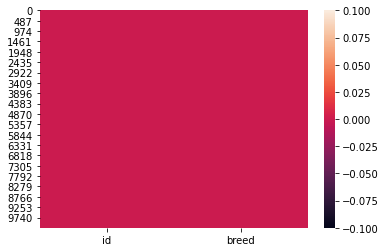

In [ ]:
sns.heatmap(label_csv.isnull())

In [ ]:
# How many images are there of each breed
label_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

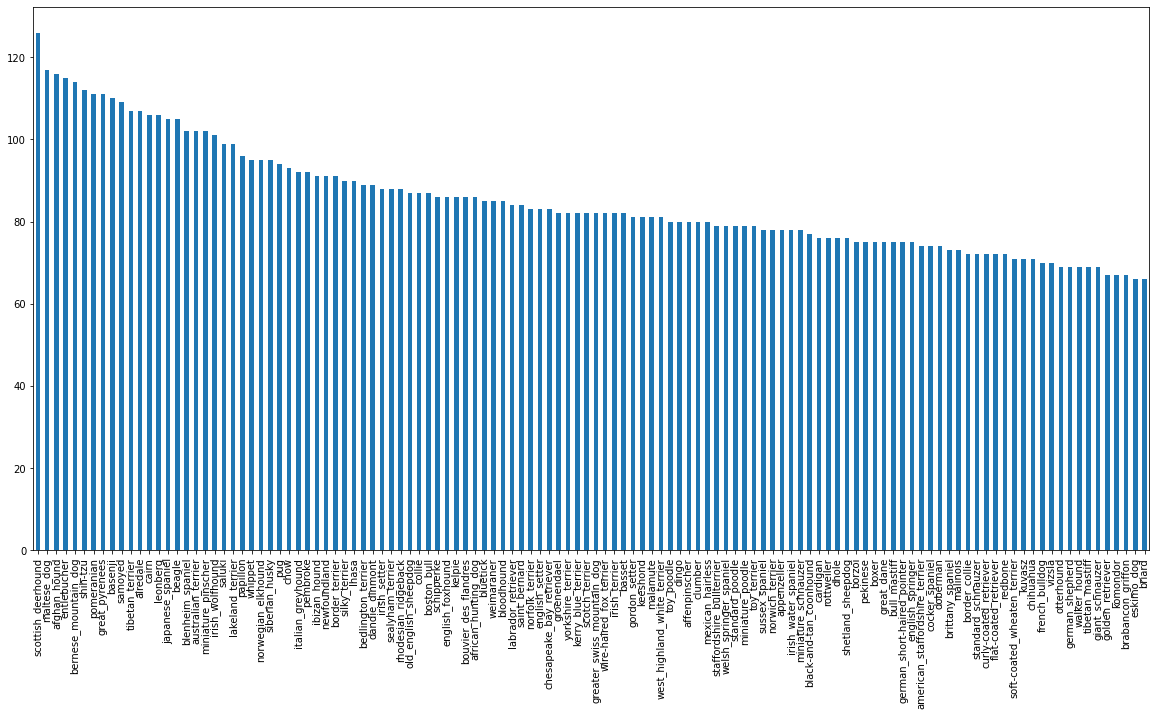

In [ ]:
label_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [ ]:
label_csv["breed"].value_counts().median()

82.0

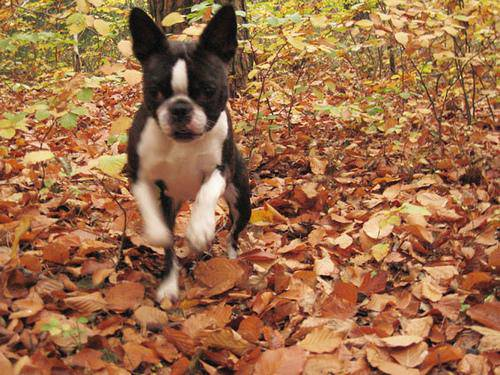

In [ ]:
## Let's view a image
from IPython.display import Image
Image("drive/MyDrive/Dog_Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")



### Getting images and their labels

let's get a list of all our image file

In [ ]:
## Create pathnames from image ID's
filenames = ["drive/MyDrive/Dog_Vision/train/" + fname + ".jpg" for fname in label_csv["id"]]

# Check the first 10
filenames[:10]

['drive/MyDrive/Dog_Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog_Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog_Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog_Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog_Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog_Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog_Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog_Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog_Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog_Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
import os
os.listdir("drive/MyDrive/Dog_Vision/train")[:10]

['e3cc185776379b55e23a9973bce785b7.jpg',
 'e5d7f92c5a70ddd58cf5dd32d573bd2b.jpg',
 'e78ff6b0a2d3a58234760d45e984eccf.jpg',
 'e36c116cdff32db5d5b87b3c789ce46c.jpg',
 'e2ac9b607458c25b1422271887f27e35.jpg',
 'e125be9ab7aa556c82f6b33e316fb523.jpg',
 'e236f0b66a5a700022dbed8458e81d26.jpg',
 'e62630fa77dea4ee5a100e23edc6d061.jpg',
 'e399ac36963facd47d52aa56df4e6e83.jpg',
 'ddf23184178185362a7f99031328aae8.jpg']

In [ ]:
## Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/MyDrive/Dog_Vision/train")) == len(filenames):
  print("Filenames match actual amount of files!!! Proceed.")

else:
  print("Filenames do no match actual amount of files,check the targget directory.")


Filenames match actual amount of files!!! Proceed.


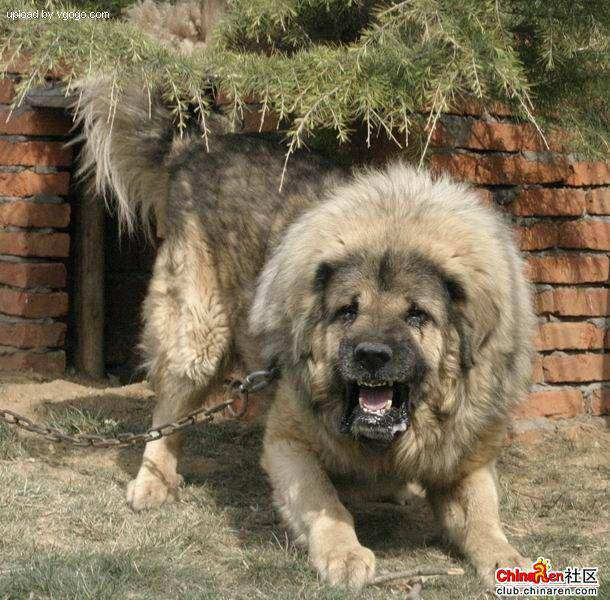

In [ ]:
## One more check
Image(filenames[9000])

In [ ]:
label_csv["breed"][9000]

'tibetan_mastiff'